# Visualization with Matplotlib and Seaborn

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [49]:
df = pd.read_csv('../data/external/heart_failure_clinical_records_dataset.csv', low_memory=False)

### Display the first few rows of the dataset

In [50]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Check the column names

In [51]:
df.columns # Getting to know the column names for further visualization of data

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Check missing values

In [52]:
df.isnull().sum() # Check for null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### There is no missing values in the dataset.

### Display Summary Statistics

In [53]:
df.describe() # Getting to know the structure of dataset for a clear visualization

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Below are few Visualizations for the dataset

#### LINE PLOT

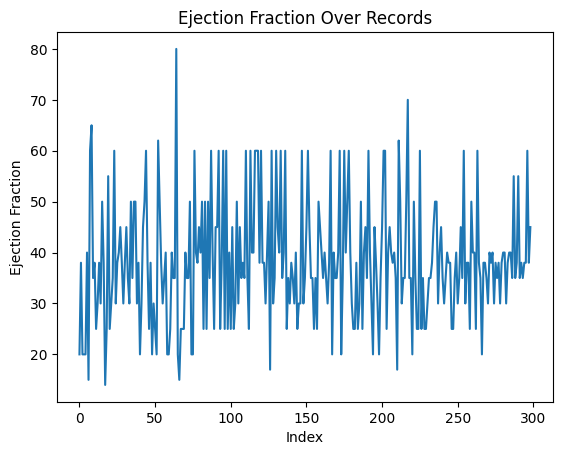

In [54]:
# 1. Line plot for ejection fraction trend
plt.plot(df['ejection_fraction'])
plt.title('Ejection Fraction Over Records')
plt.xlabel('Index')
plt.ylabel('Ejection Fraction')
plt.show()

#### PIE CHART

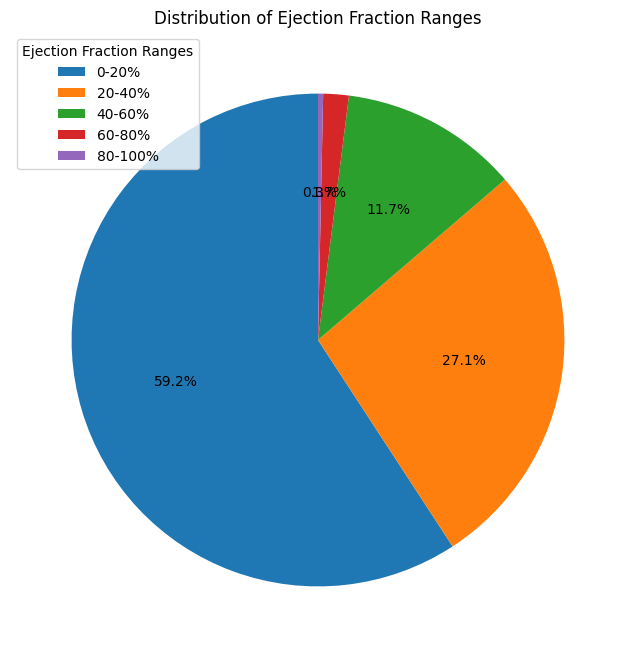

In [70]:
# 2. Calculating ejection fraction ranges
ef_bins = [0, 20, 40, 60, 80, 100]
ef_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

df['ef_range'] = pd.cut(df['ejection_fraction'], bins=ef_bins, labels=ef_labels, right=False)

ef_distribution = df['ef_range'].value_counts()

# Pie chart for ejection fraction distribution
plt.figure(figsize=(8, 8))
plt.pie(ef_distribution, autopct='%1.1f%%', startangle=90)
plt.legend(loc='best', labels=ef_labels, title="Ejection Fraction Ranges")
plt.title('Distribution of Ejection Fraction Ranges')
plt.show()


#### SCATTER PLOT

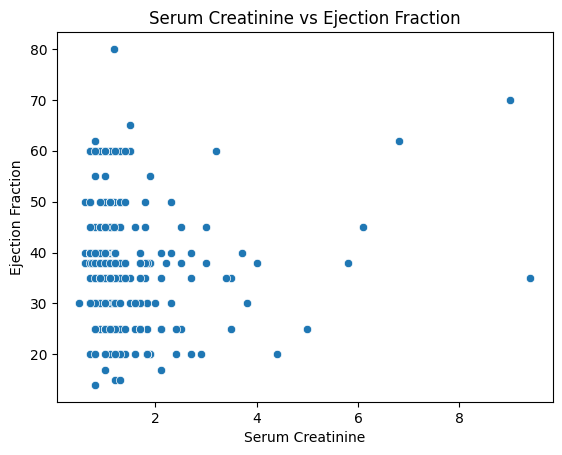

In [56]:
# 3. Scatter plot for serum creatinine vs ejection fraction
sns.scatterplot(x='serum_creatinine', y='ejection_fraction', data=df)
plt.title('Serum Creatinine vs Ejection Fraction')
plt.xlabel('Serum Creatinine')
plt.ylabel('Ejection Fraction')
plt.show()

#### HISTOGRAM

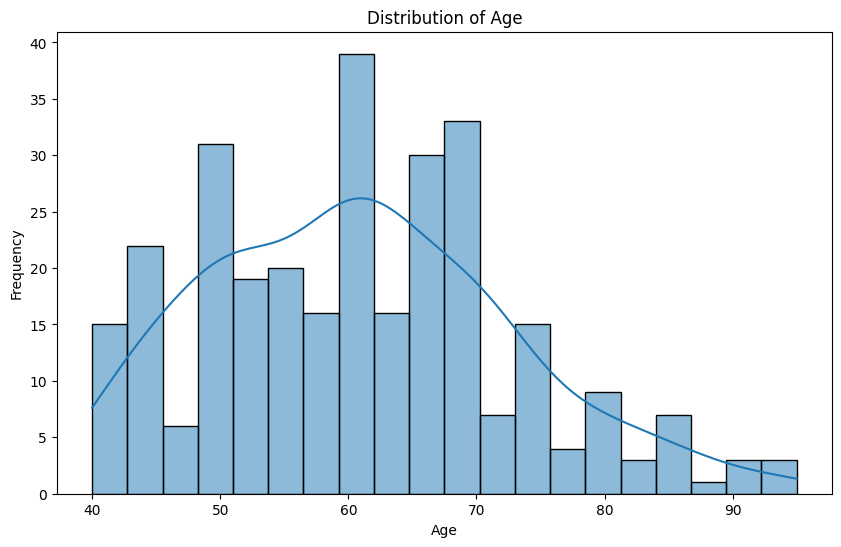

In [57]:
# 4. Histogram for the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### HEATMAP

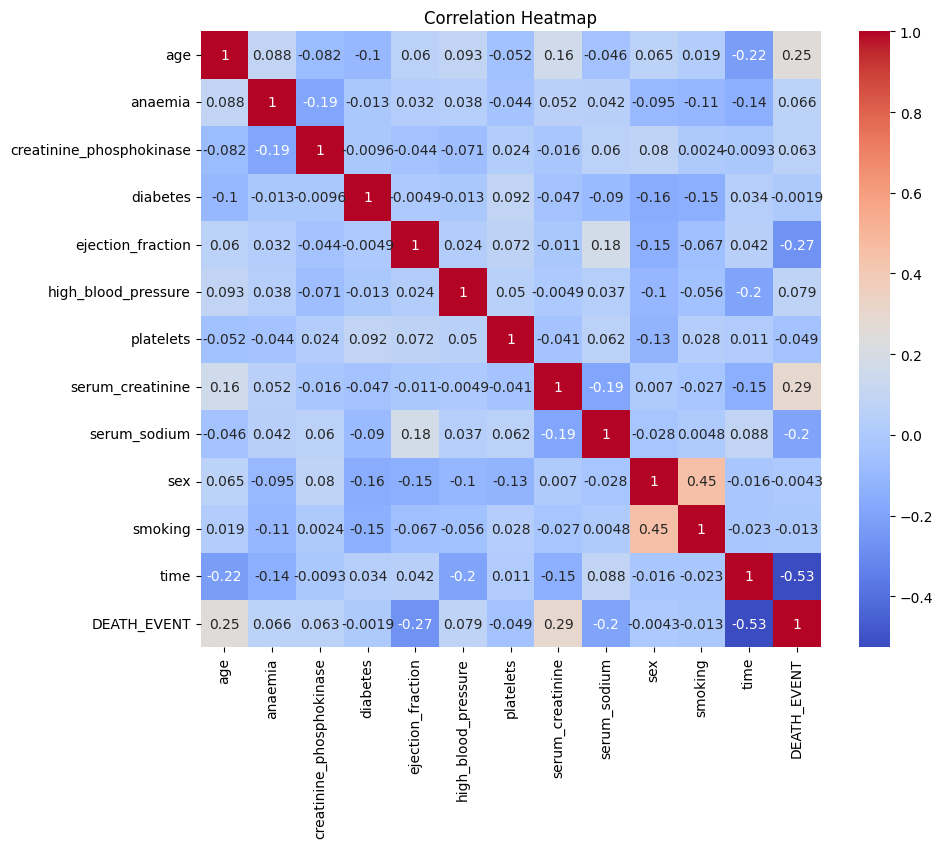

In [58]:
# 5. Filter the dataframe to include only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Creating meaningful visualizations with queries

### 1. Age Distribution of Patients (Histogram)
##### Questions: What is the age distribution of patients?
##### Answer: Provides the age distribution to understand the demographics of patients.

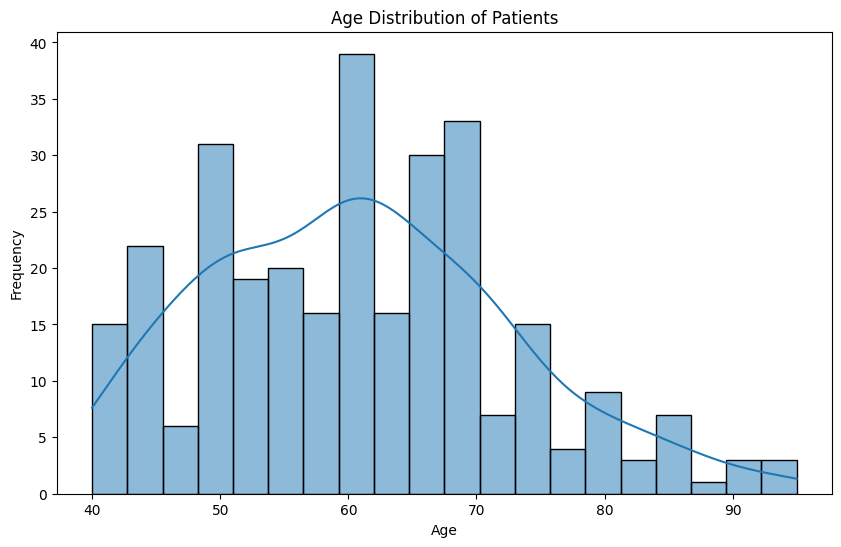

In [59]:
# Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2. Gender Distribution (Bar Plot)

#### Question: What is the gender distribution in the dataset?
#### Answer: Highlights the proportion of males and females in the dataset.

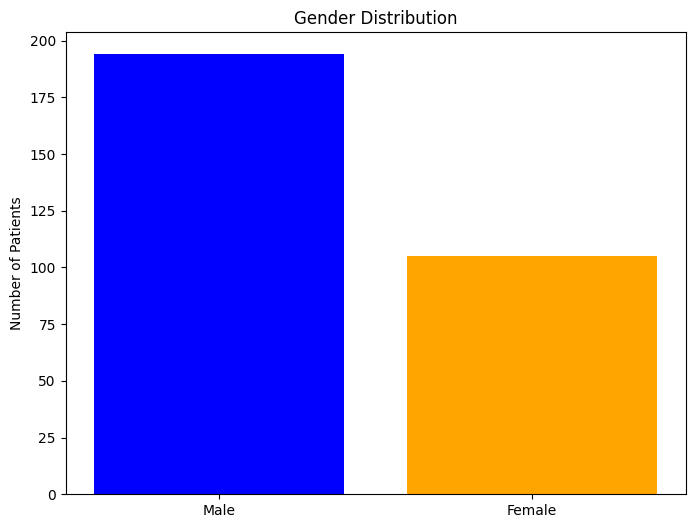

In [72]:
# Visualization: Bar Plot
gender_counts = df['sex'].value_counts()
gender_labels = ['Male', 'Female']

plt.figure(figsize=(8, 6))
plt.bar(gender_labels, gender_counts, color=['blue', 'orange'])  # Specify colors
plt.title('Gender Distribution')
plt.ylabel('Number of Patients')
plt.show()


### 3. Heart Failure Distrubution (Pie Chart)

#### Question: How many patients had heart failure (death_event)?
#### Answer: Shows the percentage of patients who experienced heart failure.

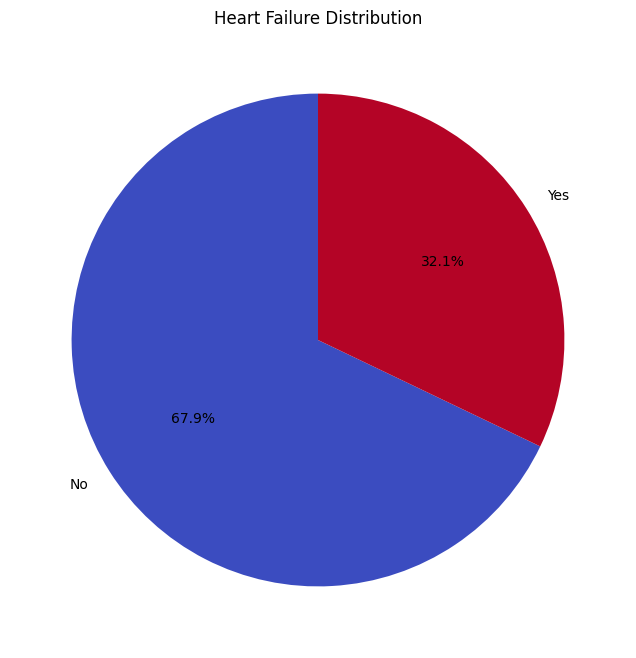

In [61]:
# Visualization: Pie Chart
heart_failure_counts = df['DEATH_EVENT'].value_counts()
heart_failure_labels = ['No', 'Yes']

plt.figure(figsize=(8, 8))
heart_failure_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=heart_failure_labels, cmap='coolwarm')
plt.title('Heart Failure Distribution')
plt.ylabel('')
plt.show()


### 4. Age vs Serum Creatinine Levels (Scatter Plot)
#### Question: What is the relationship between age and serum creatinine levels?
#### Answer: Identifies trends or anomalies in serum creatinine levels across ages.

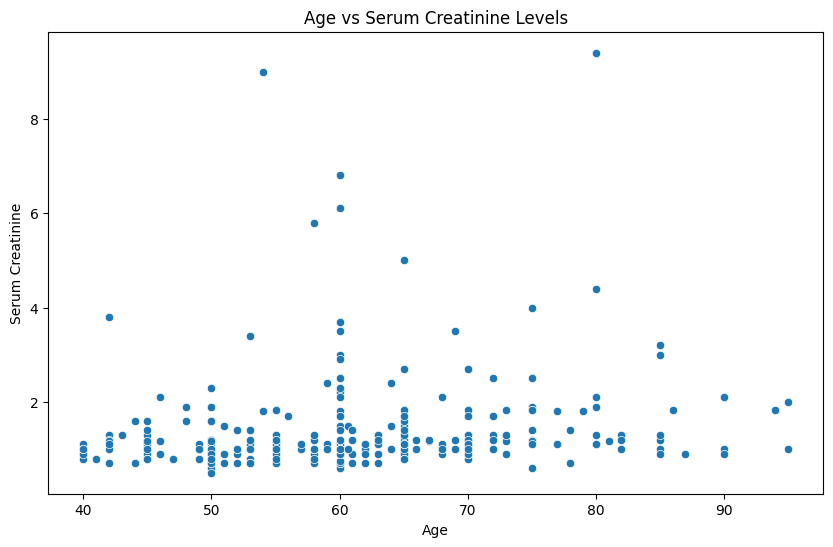

In [62]:
# Visualization: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='serum_creatinine', data=df)
plt.title('Age vs Serum Creatinine Levels')
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.show()

### 5. Correlation (Heatmap)

#### Question: What is the correlation between numeric features?
#### Answer: Highlights relationships between variables to explore further analysis.

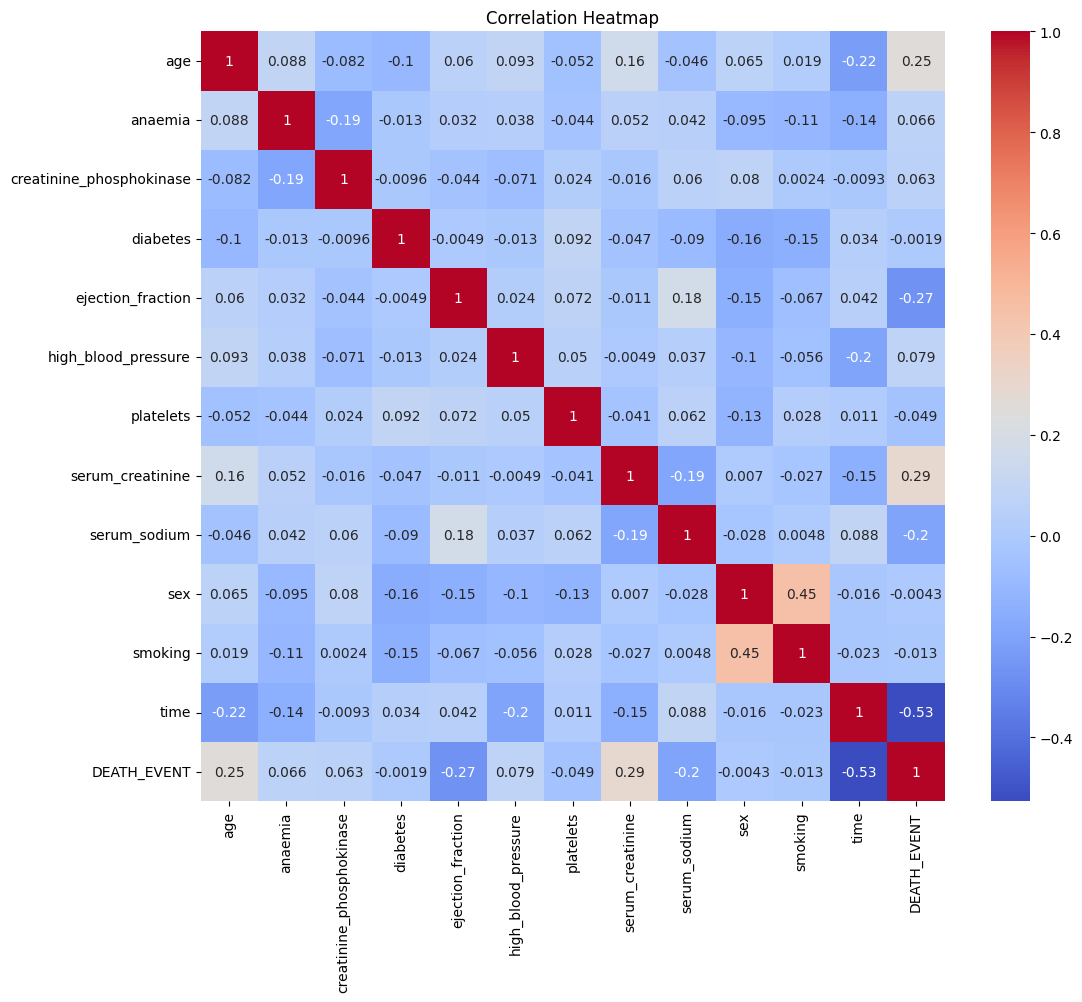

In [63]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Visualization: Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### 6. Ejection Fraction Across Age (Line Plot)
#### Question: What is the trend in ejection fraction values across age groups?
#### Answer: Displays the trend of ejection fraction levels across age groups.

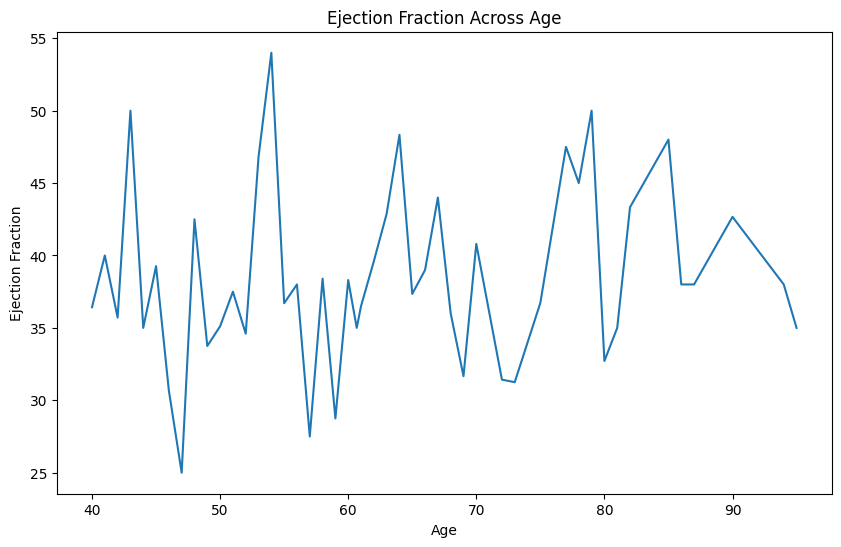

In [73]:
# Visualization: Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='ejection_fraction', data=df, errorbar=None)  # Replace `ci=None` with `errorbar=None`
plt.title('Ejection Fraction Across Age')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.show()

### 7. Smoking Habits Distribution (Bar Plot)
#### Question: What is the distribution of smoking habits among patients?
#### Answer: Provides insights into the proportion of smokers vs non-smokers.

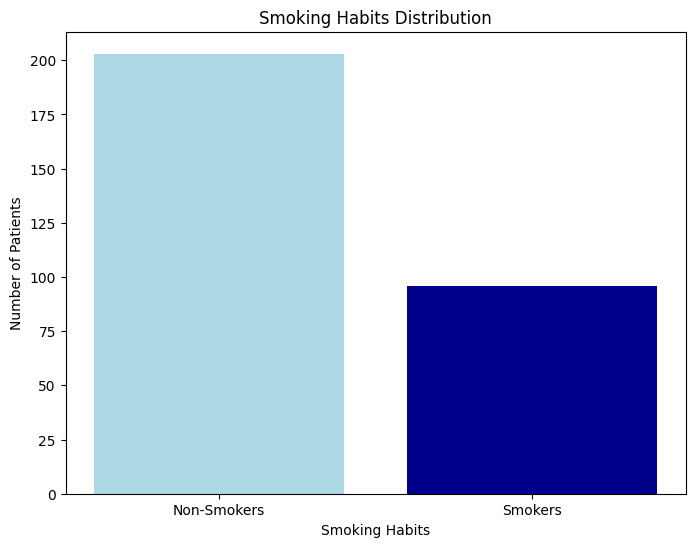

In [76]:
# Visualization: Bar Plot
smoking_counts = df['smoking'].value_counts()
smoking_labels = ['Non-Smokers', 'Smokers']

plt.figure(figsize=(8, 6))
plt.bar(smoking_labels, smoking_counts, color=['lightblue', 'darkblue'])  # Use colors directly
plt.title('Smoking Habits Distribution')
plt.ylabel('Number of Patients')
plt.xlabel('Smoking Habits')
plt.show()

### 8. Diabetes vs Heart Failure (Bar Plot)
#### Question: What is the relationship between diabetes and heart failure?
#### Answer: Illustrates the impact of diabetes on heart failure rates.

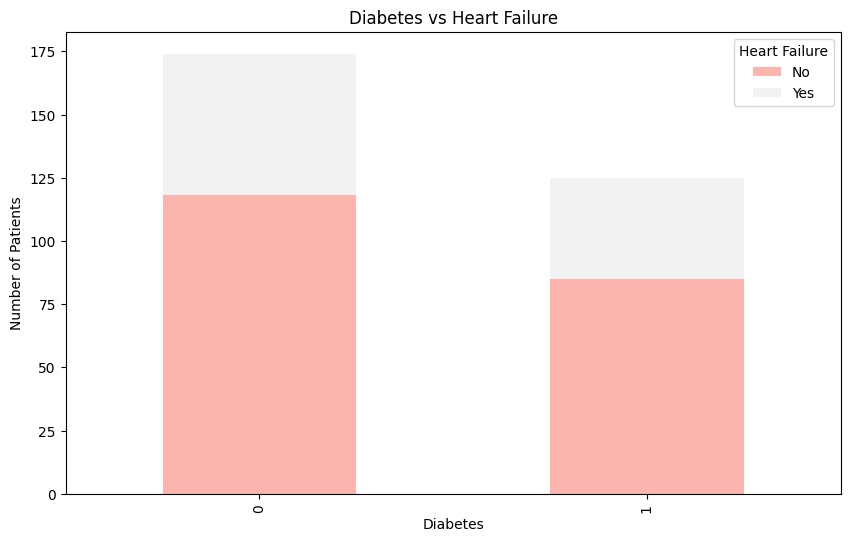

In [66]:
# Visualization: Stacked Bar Plot
df_diabetes = df.groupby(['diabetes', 'DEATH_EVENT']).size().unstack()

df_diabetes.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('Diabetes vs Heart Failure')
plt.xlabel('Diabetes')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Failure', labels=['No', 'Yes'])
plt.show()

### 9. Serum Sodium Levels vs Heart Failure (Box Plot)

#### Question: What is the serum sodium distribution for heart failure patients?
#### Answer: Shows how serum sodium levels vary with heart failure.

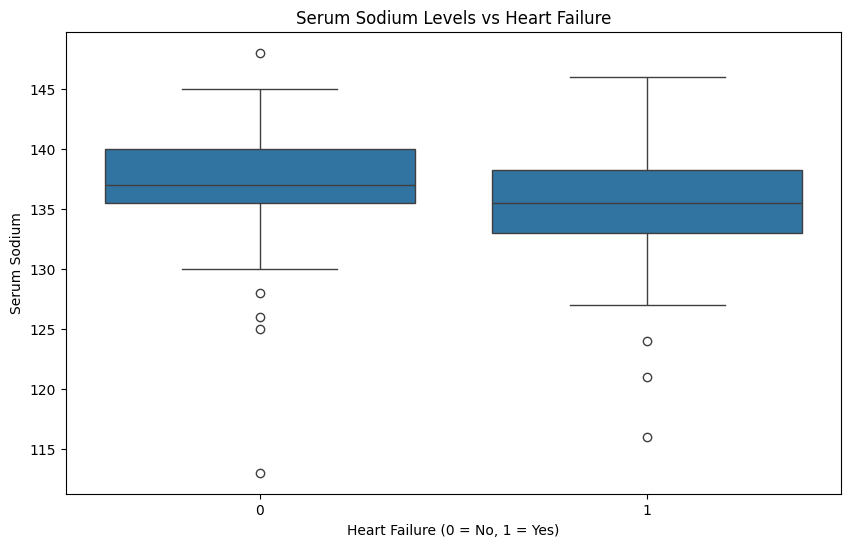

In [67]:
# Visualization: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df)
plt.title('Serum Sodium Levels vs Heart Failure')
plt.xlabel('Heart Failure (0 = No, 1 = Yes)')
plt.ylabel('Serum Sodium')
plt.show()

### 10. Average Creatinine Phosphokinase by Heart Failure (Bar Plot)

#### Question: What is the average creatinine phosphokinase across heart failure groups?
#### Answer: Highlights the average CPK levels for patients with and without heart failure.

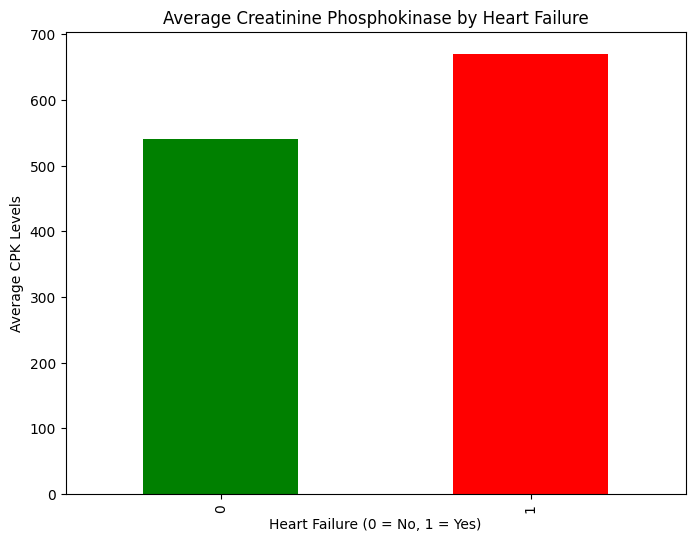

In [68]:
# Visualization: Bar Plot
avg_cpk = df.groupby('DEATH_EVENT')['creatinine_phosphokinase'].mean()

plt.figure(figsize=(8, 6))
avg_cpk.plot(kind='bar', color=['green', 'red'])
plt.title('Average Creatinine Phosphokinase by Heart Failure')
plt.xlabel('Heart Failure (0 = No, 1 = Yes)')
plt.ylabel('Average CPK Levels')
plt.show()